In [242]:
!pip install pandas

In [243]:
pip install matplotlib



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [244]:
pip install seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [245]:
import pandas as pd

df = pd.read_csv("Telco_customer_churn.csv")  
df['Tenure Months'].head()



0     2
1     2
2     8
3    28
4    49
Name: Tenure Months, dtype: int64

In [246]:

df = df[['CustomerID', 'Contract', 'Monthly Charges', 'Total Charges', 'Churn Value', 'Churn Score','Tenure Months']]

contract_map = {
    'Month-to-month': 0,
    'One year': 1,
    'Two year': 2
}
df['Contract']= df['Contract'].map(contract_map)


In [247]:
print(df['Total Charges'].head(10))
print(df['Total Charges'].dtype)
print(df['Total Charges'].isnull().sum())

0     108.15
1     151.65
2      820.5
3    3046.05
4     5036.3
5     528.35
6      39.65
7      20.15
8    4749.15
9       30.2
Name: Total Charges, dtype: object
object
0


In [248]:
df['Total Charges']= pd.to_numeric(df['Total Charges'], errors= 'coerce')
print(df['Total Charges'].dtype)

float64


In [249]:
df[['Monthly Charges', 'Total Charges']].describe()

,Monthly Charges,Total Charges
count,7043.000000,7032.000000
mean,64.761692,2283.300441
std,30.090047,2266.771362
min,18.250000,18.800000
25%,35.500000,401.450000
50%,70.350000,1397.475000
75%,89.850000,3794.737500
max,118.750000,8684.800000


In [250]:
df['Total Charges'].mean()

np.float64(2283.3004408418656)

In [251]:
df = df[['CustomerID', 'Contract', 'Monthly Charges', 'Total Charges', 'Churn Value', 'Churn Score', 'Tenure Months']]

df.head(1000)

,CustomerID,Contract,Monthly Charges,Total Charges,Churn Value,Churn Score,Tenure Months
0,3668-QPYBK,0,53.85,108.15,1,86,2
1,9237-HQITU,0,70.70,151.65,1,67,2
2,9305-CDSKC,0,99.65,820.50,1,86,8
3,7892-POOKP,0,104.80,3046.05,1,84,28
4,0280-XJGEX,0,103.70,5036.30,1,89,49
...,...,...,...,...,...,...,...
995,4958-XCBDQ,0,101.40,3496.30,1,92,35
996,8337-UPOAQ,0,89.80,914.30,1,76,10
997,1725-IQNIY,2,109.75,6110.20,1,90,54
998,6598-RFFVI,1,19.30,28.30,1,94,2


Text(0, 0.5, 'Number of Customers')

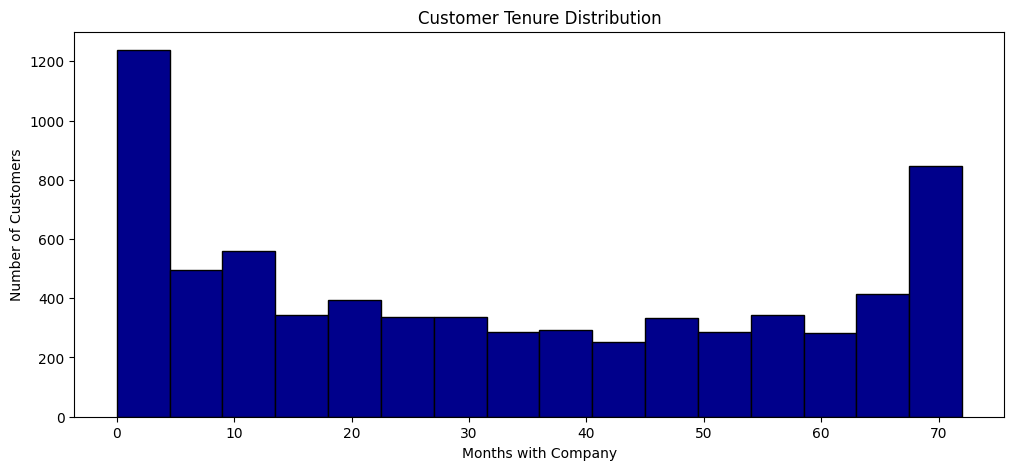

In [252]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.hist(df['Tenure Months'], bins= 'fd', color= 'darkblue', edgecolor='black')
plt.title("Customer Tenure Distribution")
plt.xlabel("Months with Company")
plt.ylabel("Number of Customers")

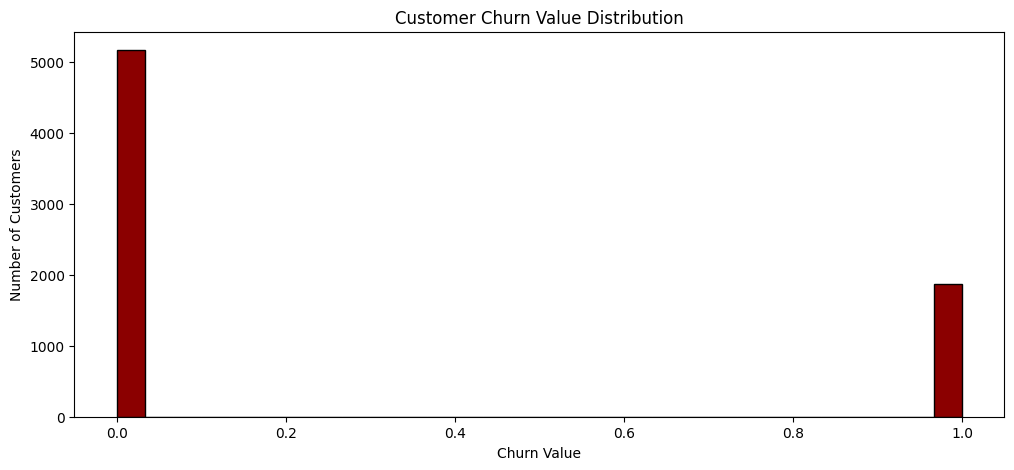

In [253]:

plt.figure(figsize=(12,5))
plt.hist(df['Churn Value'], bins= 30, color='darkred', edgecolor='black')
plt.title("Customer Churn Value Distribution")
plt.xlabel("Churn Value")
plt.ylabel("Number of Customers")
plt.show()


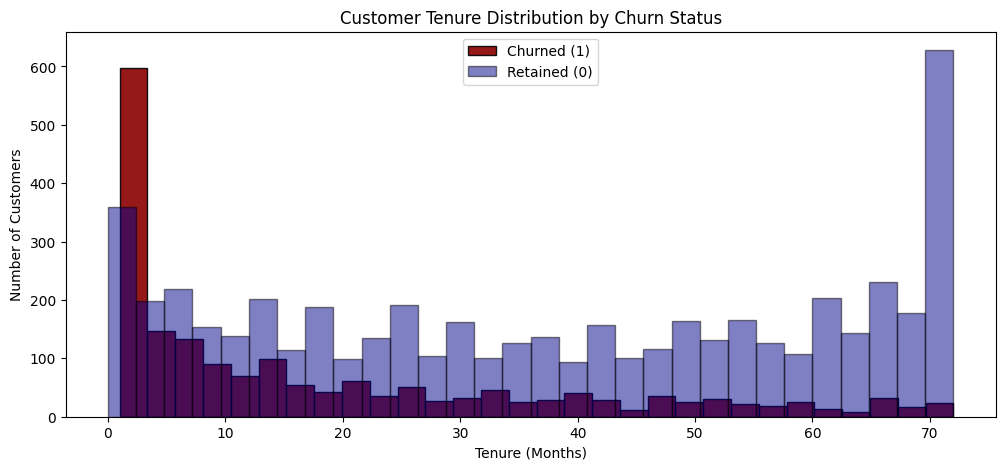

In [254]:
import matplotlib.pyplot as plt




churned = df[df['Churn Value'] == 1]['Tenure Months']
retained = df[df['Churn Value'] == 0]['Tenure Months']


plt.figure(figsize=(12,5))


plt.hist(churned, bins=30, alpha=0.9, color='darkred', edgecolor='black', label='Churned (1)')
plt.hist(retained, bins=30, alpha=0.5, color='darkblue', edgecolor='black', label='Retained (0)')

plt.title("Customer Tenure Distribution by Churn Status")
plt.xlabel("Tenure (Months)")
plt.ylabel("Number of Customers")
plt.legend()
plt.show()

/var/folders/dk/0ftz3l0n38j9xsy9yhgzc7h00000gn/T/ipykernel_1013/2480495581.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


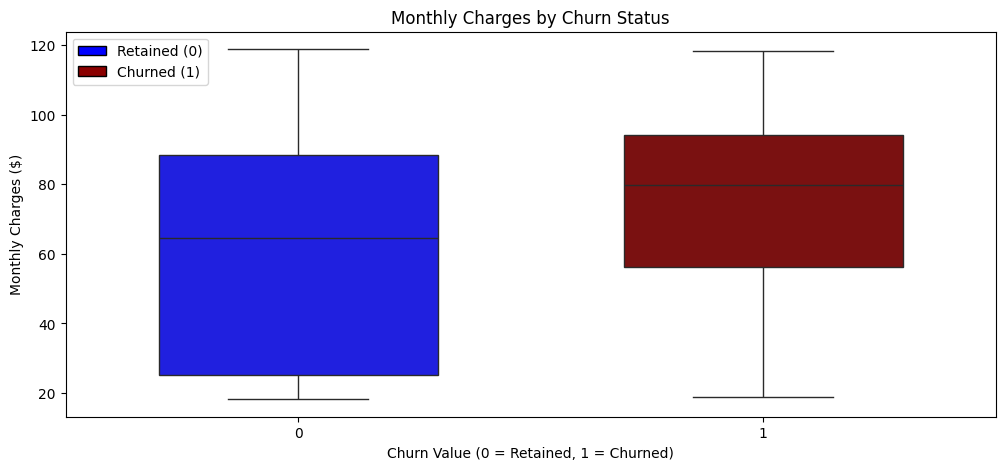

In [255]:
import matplotlib.pyplot as pd
import numpy as np
import pandas as pd
import seaborn as sns


plt.figure(figsize= (12,5))

sns.boxplot(
    x= 'Churn Value'
,y= 'Monthly Charges'
,data= df
,palette=[ 'blue', 'darkred']
,width= 0.6
)

from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='blue', edgecolor='black', label='Retained (0)'),
    Patch(facecolor='darkred', edgecolor='black', label='Churned (1)')
]

plt.legend(handles=legend_elements, loc='upper left')

plt.title("Monthly Charges by Churn Status")
plt.xlabel("Churn Value (0 = Retained, 1 = Churned)")
plt.ylabel("Monthly Charges ($)")
plt.show()




